Question 1

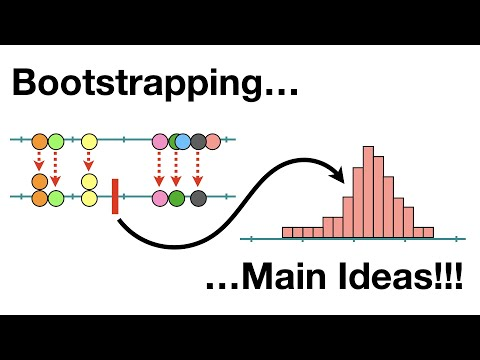

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

The standard error of the mean refers to the variability/spread of the mean of a sample if you were to repeatedly sample from the same population - in other words sampling by using bootstrapping. The standard deviation, however, measures the spread of individual data points around the mean of the original sample itself. 

Question 2 

A confidence interval tells you the range of values in which the true population mean lies in. To calculate this, you need to multiply your standard error of the mean by 1.96. You get the value 1.96 by examining the normal distribution curve which is symmetrical. 1.96 is the point of the curve where 2.5% of data remains lying to right of 1.96 and to the left of -1.96. In other words, 95% of data is covered. Then, you calculate the mean of the sample. The final condfidence interval would be: Mean of sample +/- 1.96(standard error of the mean). 

Question 3

You can do this by simply creating a distribution by calculating the means for every bootstrapped sample. Then, simply, the range that covers 95% of the bootstrapped means distribution is equal to the 95% confidence interval. You can easily calculate this range by using the np.quantile() function to get the lower bound and upper bound of the range. Since you are leaving 95% of the means, np.quantile(means, 0.025) would equate to the lower bound that leaves 25% of data to the left of the bound. np.quantile(means, 0.975) equates to the upper bound leaving 97.5% of data to the left. 


Question 4


In [4]:
# in order to calculate the 95% bootstrap confidence interval for the mean:
# import library
import numpy as np

# this sample data was created for the purpose of demonstrating working code to calculate a 95% bootstrap confidence interval
sample_data = [12, 15, 14, 10, 18, 20, 16, 17, 13, 19]

# determine the number of bootstrapped samples that you will take
n_bootstraps = 1000

# store the means of the bootstrapped samples
bootstrapped_means = []

# generate a loop to calculate the mean of each bootstrapped sample
for i in range(n_bootstraps):
    # resample the original data with replacement
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    # calculate the mean of the bootstrap sample and store it
    bootstrapped_means.append(np.mean(bootstrap_sample))

# calculate the 95% confidence interval for the population mean
# you can use the np.quantile() function to easily calculate the lower and upper bounds that leave 95% in the middle
lower_bound_mean = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound_mean = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile

print(f"95% Bootstrap Confidence Interval for the Mean: [{lower_bound_mean}, {upper_bound_mean}]")

95% Bootstrap Confidence Interval for the Mean: [13.5, 17.2]


In [5]:
# if you want to change the code to calculate 95% bootstrap confidence inverval for the median:
# store the bootstrapped medians instead of the means
bootstrapped_medians = []

# generate a loop to calculate medians
for i in range(n_bootstraps):
    # resample the original data with replacement
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    # calculate the medians of the bootstrap sample and store it
    bootstrapped_medians.append(np.median(bootstrap_sample))
    
# calculate the 95% confidence interval for the population median
# you can use the np.quantile() function to easily calculate the lower and upper bounds that leave 95% in the middle
lower_bound_median = np.quantile(bootstrapped_medians, 0.025)  # 2.5th percentile
upper_bound_median = np.quantile(bootstrapped_medians, 0.975)  # 97.5th percentile

print(f"95% Bootstrap Confidence Interval for the Median: [{lower_bound_median}, {upper_bound_median}]")

95% Bootstrap Confidence Interval for the Median: [13.0, 18.0]


In order to calculate different population parameters, you simply need to change the function that calculates the statistics.

For example, to calculate mean:
bootstrapped_mean.append(np.mean(bootstrap_sample))

To calculate median:
bootstrapped_medians.append(np.median(bootstrap_sample))

To calculate variance:
bootstrapped_var.append(np.var(bootstrap_sample))

Then, you can calculate the lower and upper bounds of the 95% confidence interval using the np.quantile() function.

## Summary of interactions for questions 1, 2, 3, and 4

Here is a summary of our exchanges for your homework submission:

1. Difference between Standard Error of the Mean and Standard Deviation:
The standard deviation (SD) measures the variability of individual data points in a sample, reflecting the spread of the data.
The standard error of the mean (SEM) measures the variability of the sample means if we were to repeatedly sample from the population. It provides an estimate of the precision of the sample mean.
SD is about the spread of data, while SEM indicates the precision of the mean estimate.
2. Using SEM to Create a 95% Confidence Interval:
A 95% confidence interval is created by taking the sample mean and adding/subtracting 1.96 times the SEM (since 1.96 is the z-score that covers 95% of the normal distribution):
Mean
±
1.96
×
SEM
Confidence Interval=Mean±1.96×SEM
This interval gives a range where the true population mean is likely to fall with 95% confidence.
3. How the Z-Score (1.96) is Derived:
The value 1.96 comes from the standard normal distribution and corresponds to the point where 95% of the data lies between ±1.96 standard deviations from the mean.
It is found using z-tables or statistical software, representing the critical value where 2.5% of the data is in each tail of the distribution.
4. Creating a 95% Bootstrap Confidence Interval Without Using SEM:
To create a 95% confidence interval without using the SEM:
Generate many bootstrapped samples from the original data.
Calculate the mean of each bootstrapped sample to get a distribution of means.
Use np.quantile() to find the 2.5th percentile and 97.5th percentile of the bootstrapped means, which form the confidence interval.
This avoids using the SEM and is based directly on the empirical distribution of the bootstrapped means.
5. Creating Bootstrap Confidence Intervals for Other Statistics:
We wrote Python code to calculate a 95% bootstrap confidence interval for the population mean using resampling and the np.quantile() function.
To adapt the code for other statistics (like the median), we modified the function applied to the bootstrapped samples:
Instead of calculating the mean, we computed the median for each bootstrapped sample to get a confidence interval for the population median.
The process can similarly be adapted for other statistics, such as the variance or standard deviation, by changing the statistical function used in the resampling.
This record reflects our discussions on statistical concepts like standard error, confidence intervals, and bootstrapping, along with Python code for implementing these concepts.

Transcript: https://chatgpt.com/share/66fafba3-206c-800e-a9fd-0dc571b5e3d3

Question 5

The population mean is the true mean that is trying to be estimated using the data from the sample. Thus, depending on how you sample, the sample mean you calculate can vary and thus not actually be representative of the true population mean. As a result, people calculate confidence intervals to give an idea of the margin of error around the obtained sample mean to infer whether it is a 'good' estimator.

Question 6

1. Bootstrapping is repeatedly taking samples from the sample you already have with replacement. For example, lets say that you want to hypothesize the average height of people in your year group. There are 100 people in total in your year group. This is the population. You decide to take a random sample of 20 people and then measure their heights. Once you have measured all 20 of their heights, you pick a person randomly from the sample and measure their height. You then place the person back in the lineup and once more randomly pick a person to measure their height. You would do this 20 times. In doing so, you are using the concept of bootstrapping. There is the chance that you might randomly pick the same person to measure multiple times; however, you are able to obtain new samples of data derived from your original sample to give you many possible calculations of the mean height.
2. The purpose of bootstrapping is to get a better understanding of the "true" statistics. You could do this by replicating your experiment several times, each time choosing a different sample from your population. However, this is costly and time consuming. Bootstrapping more or less gives you a shortcut to achieve the same effect as replications.
3. Lets say that you hypothesized that the average height of your year group is 165cm. With your sample size of n, you would carry out the process of bootstrapping that I described in part 1 of question 6. Effectively, you would resample from you original sample with replacement as many times as you wish. Then, you would calculate the mean height from each bootstrap sample and create a distribution of mean heights. Afterwars, you can calculate the 95% confidence interval. If your hypothesized mean height, 165cm, falls within the 95% confidence interval, you could assess that your guess is plausible. 


Question 7

A confidence interval overlapping zero fails to reject the null hypothesis because it tells you that there is a 95% chance that the true population mean is 0. Since a sample is not representative of the entire population, its observed sample mean statistic can be inaccurate. Thus, a confidence interval is assigned to the sample mean, telling us that the population mean can occur, for example, +/- 0.5 from the sample mean. Thus, rejecting the null hypothesis would be when the confidence interval does not include 0 in its range. 

## Summary of interactions for question 7

Here is a summary of our exchanges on the topic of hypothesis testing and confidence intervals:

Summary of Interactions
Question: You asked why a confidence interval (CI) that overlaps zero leads to a failure to reject the null hypothesis, despite the observed sample mean not being zero. You also requested an explanation of what would lead to rejecting the null hypothesis in this context.

Response: I explained that when a CI includes zero, this suggests that zero is a plausible value for the population mean, which aligns with the null hypothesis that there is no effect (on average). The observed sample mean, while not zero, is still subject to variability and uncertainty. As such, if the CI covers zero, we lack sufficient evidence to reject the null hypothesis. The reasoning behind this is that hypothesis testing revolves around whether the data provide strong enough evidence to rule out the possibility that the true mean could be zero.

I also noted that the opposite conclusion—rejecting the null hypothesis—occurs when the confidence interval does not include zero. In that case, we infer that zero is not a plausible value for the population mean, providing evidence that the drug has some effect.

In both cases, the confidence interval reflects the variability and uncertainty in the sample data, guiding whether the evidence supports rejecting or failing to reject the null hypothesis.

Transcript: https://chatgpt.com/share/66fd732c-e020-800e-b43e-4df11574f9fb

Question 8

A null hypothesis means that the population mean of the difference between initial and final health score is equal to 0. In other words, the use of a vaccine had no effect on the health of a patient and any difference is simply due to chance. 

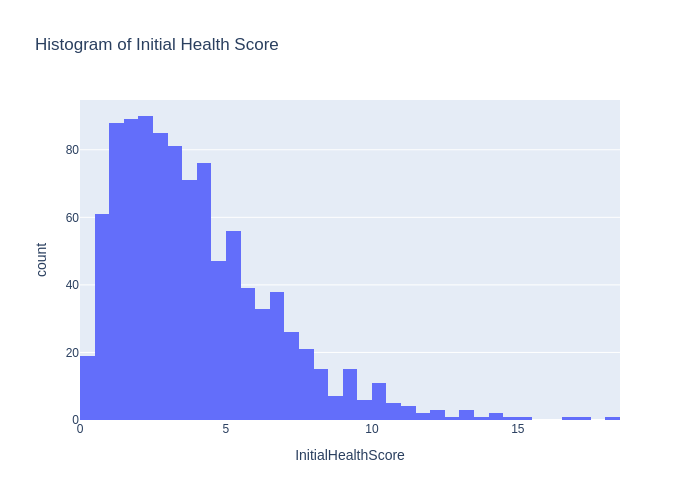

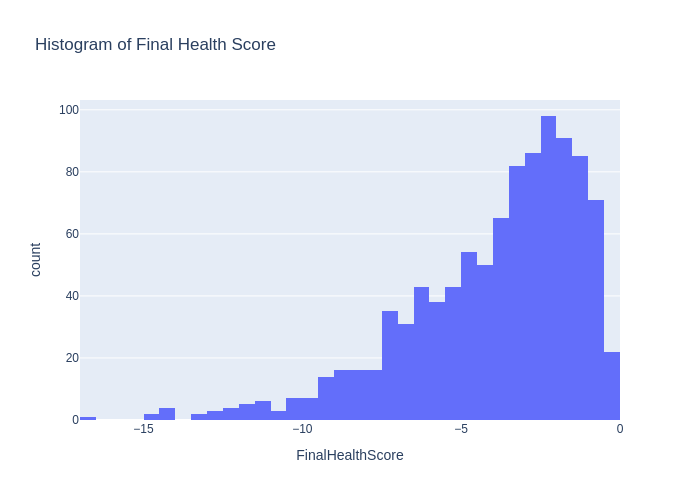

In [10]:
import pandas as pd
import plotly.express as px
from scipy import stats

sample1 = stats.gamma(a=2, scale=2).rvs(size=1000)
df = pd.read_csv('data.csv')
fig1 = px.histogram(pd.DataFrame({'InitialHealthScore': sample1 }), x="InitialHealthScore", title="Histogram of Initial Health Score")
fig1.show(renderer="png")

sample2 = -stats.gamma(a=2, scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'FinalHealthScore': sample2}), x="FinalHealthScore", title="Histogram of Final Health Score")
fig2.show(renderer="png")

In [15]:
df = pd.read_csv('data.csv')

import numpy as np
import pandas as pd

n_iterations = 1000

bootstrap_means = []
np.random.seed(1000)


for i in range(n_iterations):
    bootstrap_sample = df.sample(frac=1, replace=True)
    mean_difference = bootstrap_sample['FinalHealthScore'].mean() - bootstrap_sample['InitialHealthScore'].mean()
    bootstrap_means.append(mean_difference)

bootstrap_means = pd.Series(bootstrap_means)

print(f"Bootstrapped Mean Difference: {np.mean(bootstrap_means)}")
print(f"Bootstrap 95% Confidence Interval: {np.percentile(bootstrap_means, [2.5, 97.5])}")


Bootstrapped Mean Difference: 3.2897
Bootstrap 95% Confidence Interval: [1.  5.4]


The method that I used to analyze this data is using bootstrapping to generate many samples. Then, I took the mean difference between the patients' intital and final health scores. In other words, if the vaccine actually has a significant effect on someone's health, there should be significant positive difference when you subtract the initial from the final heath score.  

Here, you can see that the confidence interval is from 1~5.4. This range does not include 0, thus, you can reject the null hypothesis which says that the vaccine has no effect on health. On the other hand, you would accept the alternative hypothesis and conclude that the vaccine does have a statistically significant effect on health. Further considerations that you could make is analyze the representativeness of the original sample you are bootstrapping to see if it is representative of the entire population. Evidently, the original sample size is only 10; moreover, the patients' ages are all middle aged. Thus, the sample lacks representation of younger people and older people who are generally more vulnerable and reactive to illnesses and new medications.

Question 9
Yes